##  Board game Risk.

The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

I am being vague about what it plot, I will leave that to you.

For the last few marks.

A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.

(This is open ended, so it is only for the last few marks)


##### Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


### Plot



In [4]:
# Numerical arrays and rando numbers.
import numpy as np

# Plot.
import matplotlib.pyplot as plt


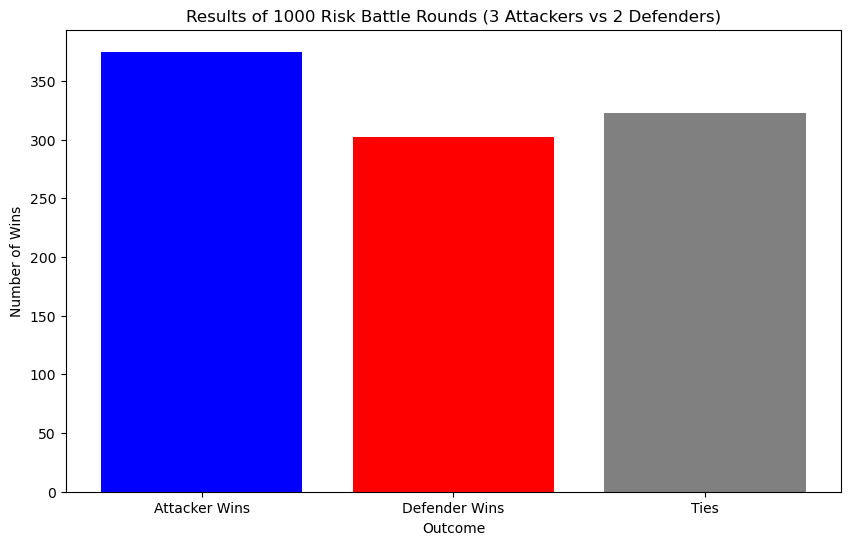

Attacker Wins: 375
Defender Wins: 302
Tie Rounds: 323


In [7]:
def roll_dice(num_dice):
    """Simulate rolling the dice"""
    return sorted(np.random.randint(1, 7, size=num_dice), reverse=True)

def simulate_battle_round():
    """Simulate a single round of battle between 3 attackers and 2 defenders"""
    attackers = roll_dice(3)
    defenders = roll_dice(2)
    
    attacker_losses = 0
    defender_losses = 0

    # Compare the highest dice rolls
    if attackers[0] > defenders[0]:
        defender_losses += 1
    else:
        attacker_losses += 1

    # Compare the second highest dice rolls
    if len(defenders) > 1 and attackers[1] > defenders[1]:
        defender_losses += 1
    else:
        attacker_losses += 1
            
    return attacker_losses, defender_losses

def simulate_battle(num_rounds):
    """Simulate multiple rounds of battle"""
    attacker_wins = 0
    defender_wins = 0
    tie_rounds = 0
    
    for _ in range(num_rounds):
        attacker_losses, defender_losses = simulate_battle_round()
        
        if defender_losses == 2:
            attacker_wins += 1
        elif attacker_losses == 2:
            defender_wins += 1
        else:
            tie_rounds += 1
            
    return attacker_wins, defender_wins, tie_rounds

# Simulate 1000 battle rounds
num_rounds = 1000
attacker_wins, defender_wins, tie_rounds = simulate_battle(num_rounds)

# Plot the results
labels = ['Attacker Wins', 'Defender Wins', 'Ties']
counts = [attacker_wins, defender_wins, tie_rounds]

plt.figure(figsize=(10,6))
plt.bar(labels, counts, color=['blue', 'red', 'grey'])
plt.title('Results of 1000 Risk Battle Rounds (3 Attackers vs 2 Defenders)')
plt.xlabel('Outcome')
plt.ylabel('Number of Wins')
plt.show()

print(f"Attacker Wins: {attacker_wins}")
print(f"Defender Wins: {defender_wins}")
print(f"Tie Rounds: {tie_rounds}")
